## import Librarys

In [1]:
import pandas as pd

## import Data

In [2]:
data = pd.read_csv('/Users/sadiakhanrupa/Bootcamp Main Phase/Self Projects/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset Description

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
This Dataset has 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. **Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



In [4]:
data.isna().sum() #dataset has no missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [7]:
data['Amount'].mean()

88.34961925093133

**average transaction amount 88 .34**

In [8]:
# lets see number of non fraud classes
data['Class'].value_counts() #non fraud values 284315, fraud values are only 492

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
len(data) #total number of entries 284807

284807

In [10]:
print('Percentage of non fraud class:', (data['Class'].value_counts()[0]/len(data))*100)
print('Percentage of fraud class:', (data['Class'].value_counts()[1]/len(data))*100)

Percentage of non fraud class: 99.82725143693798
Percentage of fraud class: 0.1727485630620034


**The Dataset is imbalanced, most of the transactions are non fraud, working on this imbalanced dataset might provide a lot of errors and probably overfit , since it can assume most transactions are non fraud. However we want our model to predict the pattern of fraud transaction.**

Text(0.5, 1.0, 'class disribution    0: Non Fraud   ||   1: Fraud')

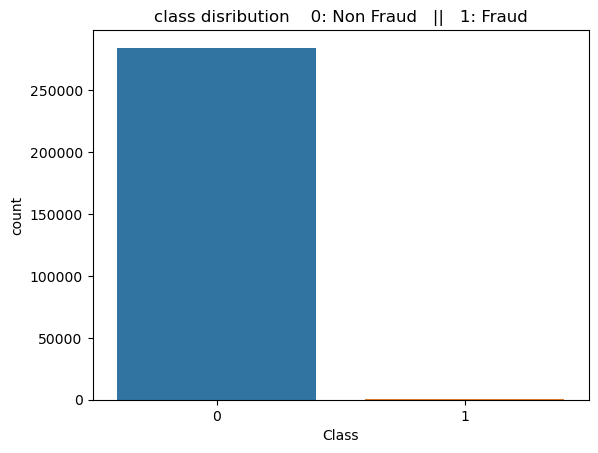

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data, x="Class")
plt.title('class disribution    0: Non Fraud   ||   1: Fraud')

**Distributions of Class : By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features (transaction amount and time). There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.**

### Distribuion of Transaction amount and time

In [12]:
transaction_amount_values = data['Amount'].values
transaction_time_values = data['Time'].values


/var/folders/yn/jzzqv3s17t5_glr9g2gqxmyh0000gn/T/ipykernel_36940/119373603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction_amount_values, ax=ax[0], color='r')
/var/folders/yn/jzzqv3s17t5_glr9g2gqxmyh0000gn/T/ipykernel_36940/119373603.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

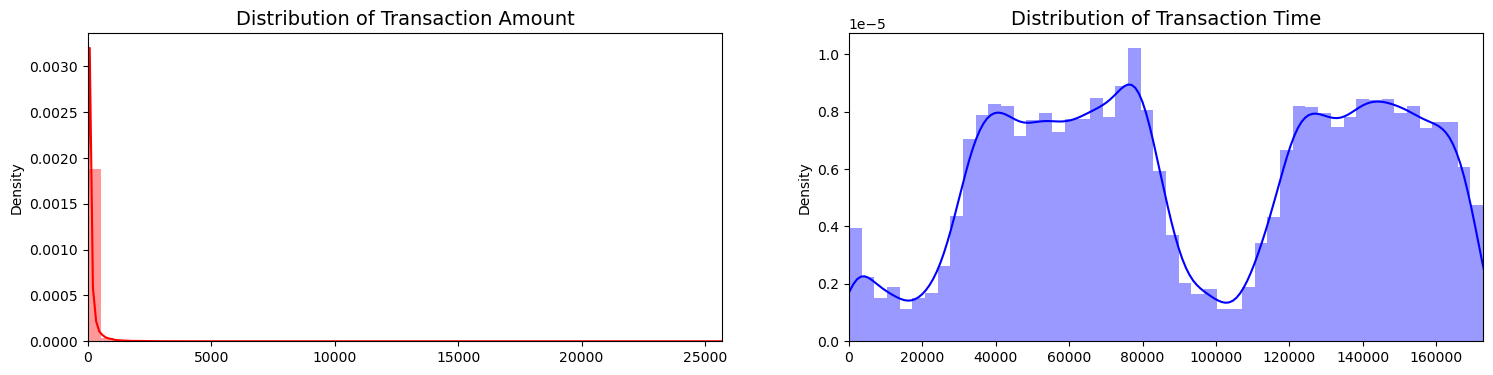

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(transaction_amount_values, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(transaction_amount_values), max(transaction_amount_values)])

sns.distplot(transaction_time_values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(transaction_time_values), max(transaction_time_values)])



plt.show()

### Scaling and Sampling
**We will first scale the columns of Time and Amount. Time and amout should be scaled as other columns. On the other hand , we neeed to create a sub smaple of our data frame in order to have balanced amount of Fraud and NOn Fraud Classes. it will help our model better to find out the pattern whether the transaction is Fraud or not.**

### What is a sub-Sample? (Under Sampling - Prototype Selection)
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.
### Why do we create a sub-Sample?
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

**Overfitting**: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.

**Wrong Correlations**: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

**Task to Do**

1. Scaled amount and scaled time are the columns with scaled values.
2. There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
3. We concat the 492 cases of fraud and non fraud, creating a new sub-sample.


## Scaling

#### as most of our datas are already scaled, here we scale the rest of the column which are not scaled yet ( Amount and Time)

In [14]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

data['scaled_amount'] = robust_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


In [16]:
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [17]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [18]:
## reposition scaled_amount and scaled_time in the dataframe
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [19]:
scaled_amount

0         1.783274
1        -0.269825
2         4.983721
3         1.418291
4         0.670579
            ...   
284802   -0.296653
284803    0.038986
284804    0.641096
284805   -0.167680
284806    2.724796
Name: scaled_amount, Length: 284807, dtype: float64

## Data Splitting

**Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.**

In [20]:
X= data.copy()
y = X.pop('Class')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [22]:
X_train.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
223361,-0.167819,0.689153,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,...,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145
165061,0.333962,0.381595,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,...,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792
238186,-0.139873,0.762145,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,...,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288
150562,1.333613,0.105476,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,...,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931
138452,0.052540,-0.023931,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,...,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672


In [23]:
y_train.head()

223361    0
165061    0
238186    0
150562    0
138452    0
Name: Class, dtype: int64

### Random Under-Sampling:


In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
1. The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)

2. Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.

3. After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

4. Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)



In [24]:
# we have a highly skewed dataset, we should make them equivalent to have a normal distribution of classes.
#lets shuffle the data before creating sub samples

data = data.sample(frac=1)

#amount of Fraud classes 492 rows
fraud_data = data.loc[data['Class']==1]


In [26]:
non_fraud_data = data.loc[data['Class'] == 0][:492]

In [28]:
#dataframe after concatanation
normal_balanced_data = pd.concat([fraud_data, non_fraud_data])

In [30]:
new_dataframe = normal_balanced_data.sample(frac=1, random_state=42)

In [31]:
new_dataframe.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
4452,0.093621,-0.950693,1.190227,-0.666224,0.301531,-0.940792,0.132278,1.762026,-1.073732,0.515898,...,-0.044109,-0.108953,-0.120231,0.161079,-1.781591,-0.056778,-0.368204,0.045687,-0.012324,0
143728,-0.293440,0.010350,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,1.560712,...,0.874720,0.911427,0.053061,-0.367701,-0.776338,0.292094,0.026000,1.062968,0.501148,1
17999,-0.097813,-0.653086,-1.568547,-0.345949,2.127236,-1.700901,-0.670257,0.508221,-1.187299,1.072863,...,0.174690,0.498743,1.211358,-0.280502,-0.253311,0.350776,-0.071993,0.216306,-0.033535,0
56703,-0.296793,-0.436413,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,1
150667,0.782505,0.107708,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,...,-0.646818,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,1


### Distribution of new baanced Dataframe
Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.



Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


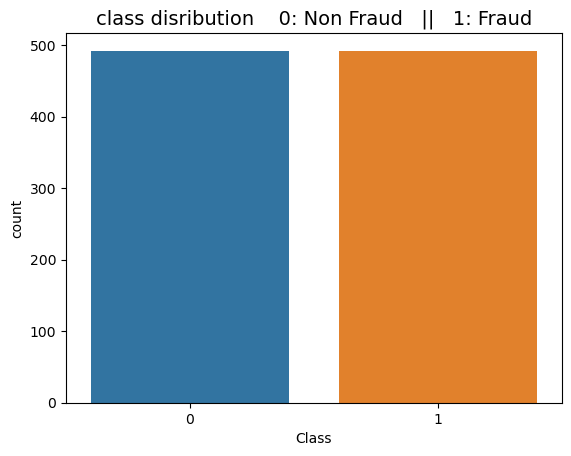

In [38]:
print('Distribution of the Classes in the subsample dataset')
print(new_dataframe['Class'].value_counts()/len(new_dataframe))



sns.countplot(new_dataframe, x='Class')
plt.title('class disribution    0: Non Fraud   ||   1: Fraud', fontsize=14)
plt.show()


### Correlation Matrices
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.
### Summary and Explanation:

1. Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

2. Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

3. BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

**Note:** We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.



In [39]:
corr = data.corr()

In [40]:
corr

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
scaled_amount,1.000000,-0.010596,-2.277087e-01,-5.314089e-01,-2.108805e-01,9.873167e-02,-3.863563e-01,2.159812e-01,3.973113e-01,-1.030791e-01,...,3.394034e-01,1.059989e-01,-6.480065e-02,-1.126326e-01,5.146217e-03,-4.783686e-02,-3.208037e-03,2.882546e-02,1.025822e-02,0.005632
scaled_time,-0.010596,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,...,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.012323
V1,-0.227709,0.117396,1.000000e+00,2.381690e-17,-6.525347e-16,-3.772137e-16,3.991691e-16,1.035410e-16,2.120439e-16,-4.203964e-17,...,8.450559e-17,-1.207881e-16,1.249084e-16,-1.252570e-19,-8.534962e-17,-2.756310e-16,-1.139011e-16,3.122725e-16,3.085874e-16,-0.101347
V2,-0.531409,-0.010593,2.381690e-17,1.000000e+00,-9.084408e-17,-2.616885e-16,1.188637e-16,3.828512e-16,-2.683877e-16,-4.687598e-17,...,3.554244e-16,1.056780e-16,1.360327e-16,2.391816e-16,-9.136670e-17,1.697333e-16,3.610391e-16,-3.107777e-16,-5.783244e-16,0.091289
V3,-0.210880,-0.419618,-6.525347e-16,-9.084408e-17,1.000000e+00,-2.201867e-16,-5.462216e-16,1.386260e-15,1.658045e-16,-6.999908e-17,...,-8.398734e-17,-1.424145e-16,-2.259898e-16,3.876967e-17,4.057347e-17,7.435123e-17,-2.163330e-16,5.027715e-16,6.996084e-16,-0.192961
V4,0.098732,-0.105260,-3.772137e-16,-2.616885e-16,-2.201867e-16,1.000000e+00,-1.910103e-15,-4.300494e-16,-7.845624e-17,6.333007e-16,...,4.363398e-18,-8.724539e-17,2.506103e-16,2.777273e-16,1.554842e-16,6.802374e-16,-4.170057e-16,-1.144580e-16,3.807305e-17,0.133447
V5,-0.386356,0.173072,3.991691e-16,1.188637e-16,-5.462216e-16,-1.910103e-15,1.000000e+00,3.914421e-16,3.207796e-17,4.452050e-16,...,-7.436146e-16,-4.656849e-18,4.228854e-18,1.010142e-16,-9.701528e-16,-6.188550e-17,3.471334e-16,3.220655e-16,-1.892538e-16,-0.094974
V6,0.215981,-0.063016,1.035410e-16,3.828512e-16,1.386260e-15,-4.300494e-16,3.914421e-16,1.000000e+00,1.159455e-16,-2.028616e-16,...,2.304604e-16,-6.109145e-17,-8.301376e-17,4.542600e-17,-1.098141e-15,5.725361e-16,-2.589027e-16,-2.292506e-16,5.309274e-16,-0.043643
V7,0.397311,0.084714,2.120439e-16,-2.683877e-16,1.658045e-16,-7.845624e-17,3.207796e-17,1.159455e-16,1.000000e+00,-8.672250e-17,...,-1.254839e-16,2.748401e-17,-6.310685e-16,-1.717049e-17,1.564390e-17,7.795971e-17,-8.905759e-16,1.071392e-16,5.427132e-16,-0.187257
V8,-0.103079,-0.036949,-4.203964e-17,-4.687598e-17,-6.999908e-17,6.333007e-16,4.452050e-16,-2.028616e-16,-8.672250e-17,1.000000e+00,...,-4.668670e-17,-2.964677e-17,2.571224e-17,1.040505e-17,-1.560598e-16,-1.894581e-16,-9.750949e-19,3.545313e-16,-6.261915e-16,0.019875


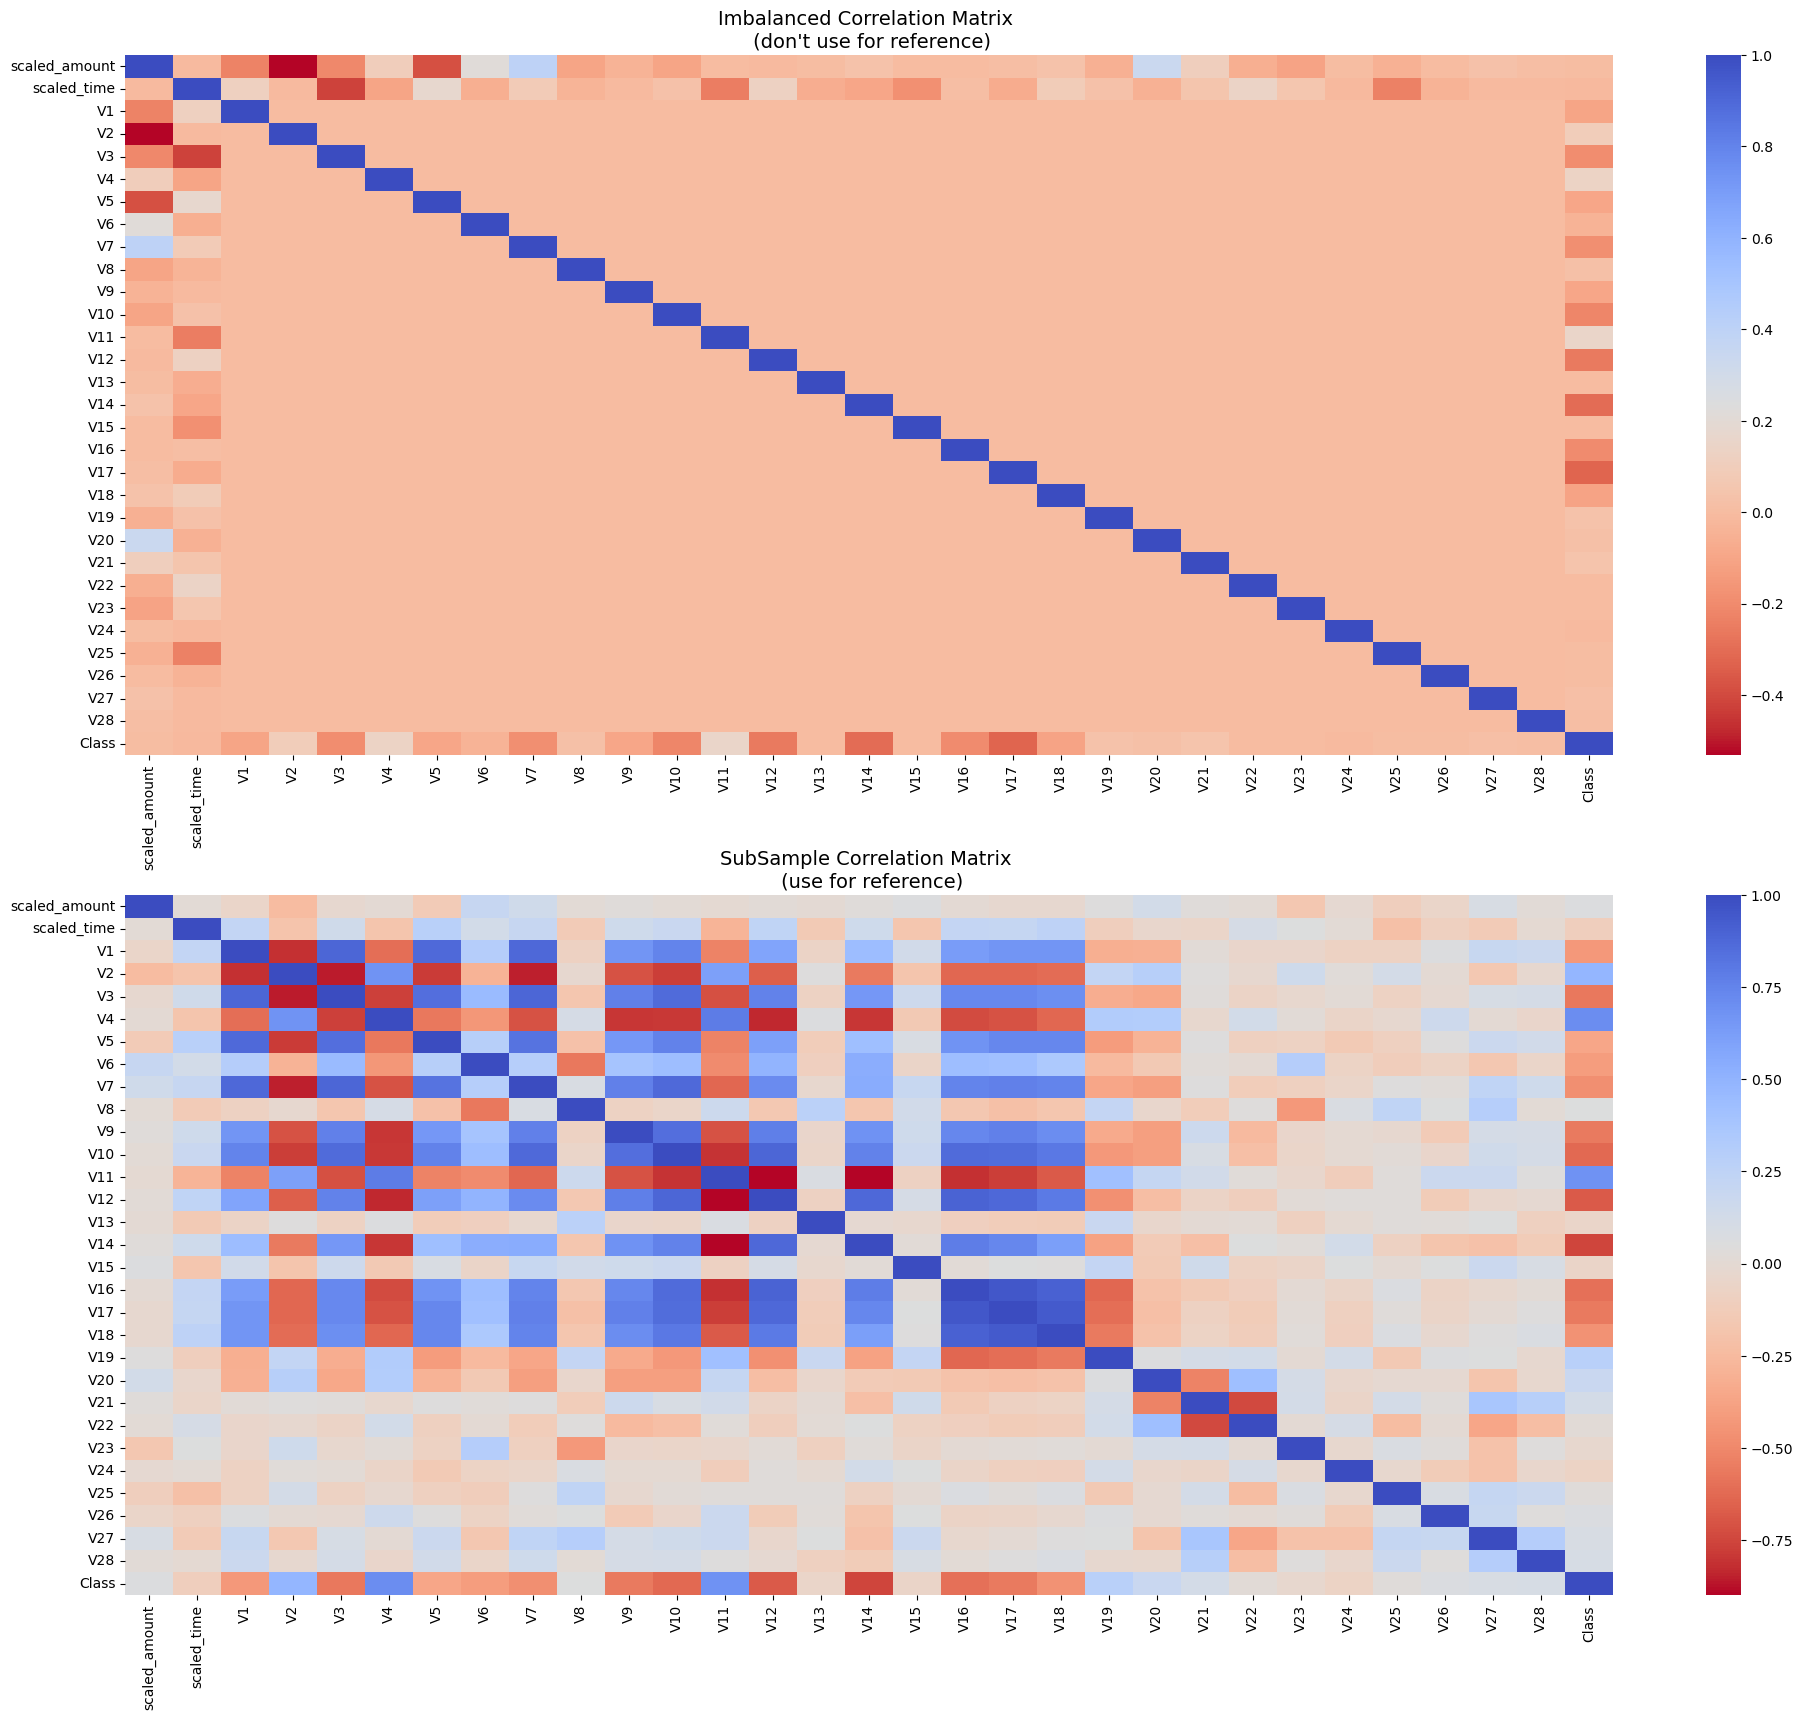

In [41]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_dataframe.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


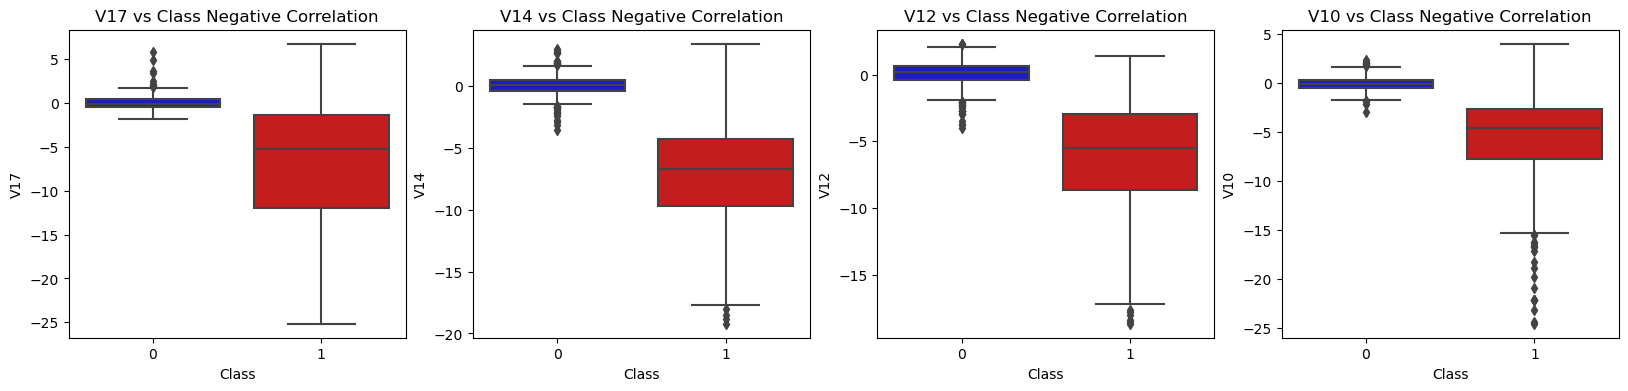

In [42]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ["#0101DF", "#DF0101"]


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_dataframe, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_dataframe, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_dataframe, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_dataframe, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()


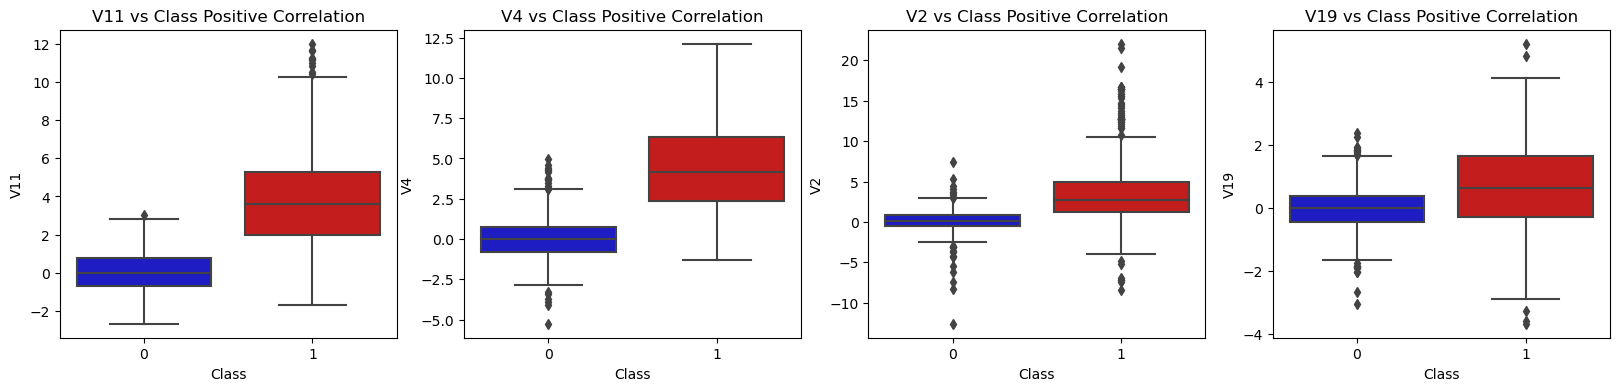

In [43]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_dataframe, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_dataframe, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_dataframe, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_dataframe, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### Anomaly Detection:


Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


### Interquartile Range Method:

**Interquartile Range (IQR):** We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

**Outlier Removal Tradeoff:**
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.
